# Assignement 3

## Imports and installs

In [30]:
%pip install numpy pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import preprocessing
import matplotlib.pyplot as plt 

## Task 0

In [32]:
data = pd.read_csv("./data/iris_clusters.csv", delimiter=";")
data

,pl,pw,sl,sw,id
0,6.7,3.0,4.6,1.5,87.0
1,6.7,2.8,4.6,1.2,209.0
2,5.0,3.6,1.6,0.5,344.0
3,6.3,3.1,5.9,2.5,401.0
4,7.0,2.9,5.7,1.7,430.0
...,...,...,...,...,...
295,6.8,3.0,5.0,2.5,14842.0
296,5.7,2.6,4.9,1.9,14843.0
297,5.6,3.4,1.2,0.2,14887.0
298,5.4,2.6,4.3,1.2,14941.0


## Task 1 K-means

,pl,pw,sl,sw,id
0,6.7,3.0,4.6,1.5,87.0
1,6.7,2.8,4.6,1.2,209.0
2,5.0,3.6,1.6,0.5,344.0
3,6.3,3.1,5.9,2.5,401.0
4,7.0,2.9,5.7,1.7,430.0
...,...,...,...,...,...
295,6.8,3.0,5.0,2.5,14842.0
296,5.7,2.6,4.9,1.9,14843.0
297,5.6,3.4,1.2,0.2,14887.0
298,5.4,2.6,4.3,1.2,14941.0


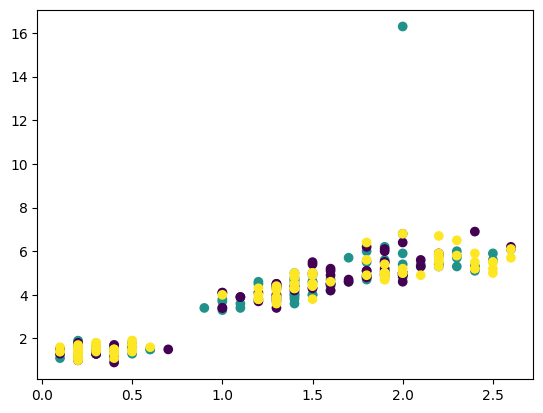

In [33]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(data)
display(data)
plt.scatter(data["sw"], data["sl"], c=kmeans.labels_, cmap='viridis') 
plt.show()

They don't coincide with the previously mentioned groups

## TASK 2: preprocessing

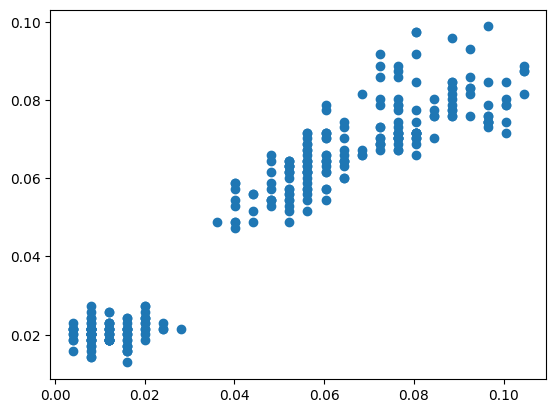

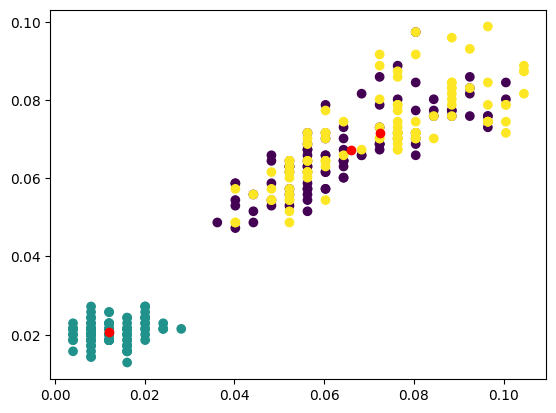

93
104
100


In [34]:
from scipy import stats

z_scores = np.abs(stats.zscore(data))
outliers_mask = (z_scores < 3).all(axis=1)
data_clean = data[outliers_mask]
data_ = data_clean.to_numpy()

data_clean = preprocessing.normalize(data_, axis = 0)

plt.scatter(data_clean[:, 3], data_clean[:, 2])
plt.show()

kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(data_clean)

plt.scatter(data_clean[:, 3], data_clean[:, 2], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,3], kmeans.cluster_centers_[:, 2], c = 'r')
plt.show()  

print(kmeans.labels_.tolist().count(0))
print(kmeans.labels_.tolist().count(1))
print(kmeans.labels_.tolist().count(2))

## Task 3

In [35]:
from sklearn import metrics
for k in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(data_clean)
    print(kmeans)
    print(metrics.davies_bouldin_score(data_clean, kmeans.labels_))

KMeans(n_clusters=2)
0.7806100329122844
KMeans(n_clusters=3)
0.8720559584990223
KMeans(n_clusters=4)
0.8062897019958533
KMeans(n_clusters=5)
0.9238278498353836
KMeans(n_clusters=6)
0.9019744310031445
KMeans(n_clusters=7)
0.8539725855600466
KMeans()
0.9624461018400353
KMeans(n_clusters=9)
0.9184615957352729


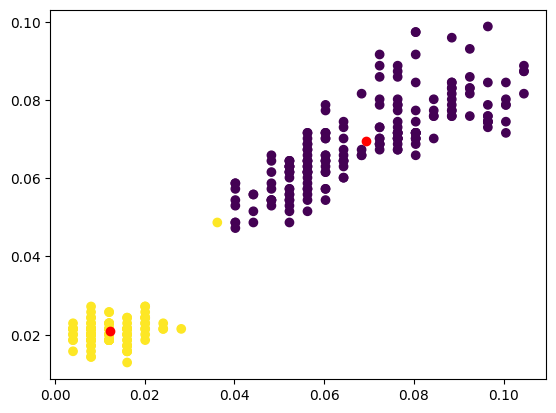

In [36]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(data_clean)

plt.scatter(data_clean[:, 3], data_clean[:, 2], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,3], kmeans.cluster_centers_[:, 2], c = 'r')
plt.show()  

## Task 4: Hierarchical clustering

In [49]:
single_link = cluster.AgglomerativeClustering(n_clusters=3, linkage='single')
single_link_labels = single_link.fit_predict(data_clean)

cluster_counts = np.bincount(single_link_labels)
print("Number of records in each of the two top clusters:")
print(cluster_counts)


Number of records in each of the two top clusters:
[192 104   1]


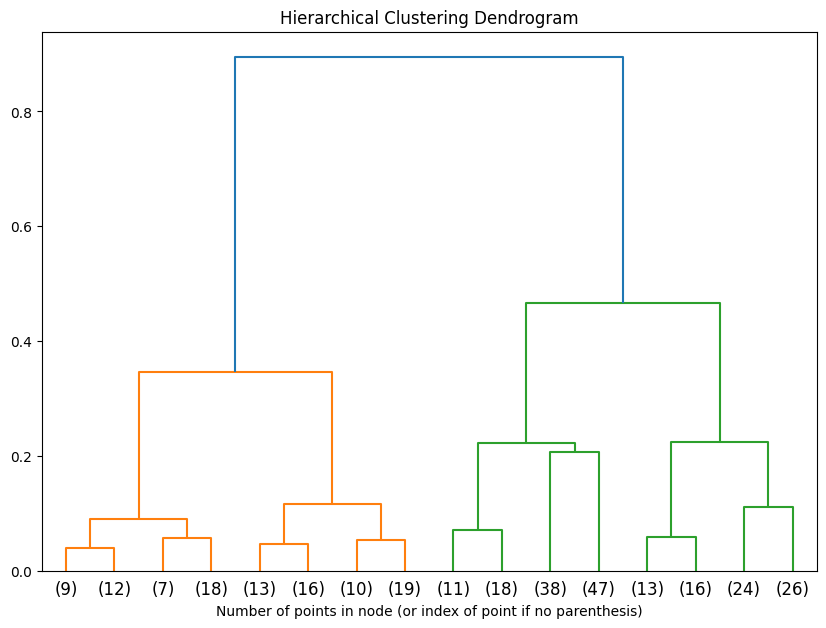

In [48]:
from scipy.cluster.hierarchy import dendrogram 

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Create a new Agglomerative Clustering model without a predetermined number of clusters
hierarchical_cluster = cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# Fit the model to our data
hierarchical_cluster = hierarchical_cluster.fit(data_clean)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plot_dendrogram(hierarchical_cluster, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.show()